# Interactive Neural Style Transfer Project
This project captures an image from your webcam, applies different artistic styles using neural style transfer, and displays the results.

In [1]:
# Install necessary libraries
!pip install tensorflow numpy matplotlib
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


### Import Required Libraries
We need to import several libraries to handle image processing, neural style transfer, and capturing images from the webcam.

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import requests
from io import BytesIO
from PIL import Image

### Load the Pre-trained Neural Style Transfer Model
We will use a pre-trained model from TensorFlow Hub to perform the style transfer.

In [3]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

### Capture an Image from the Webcam
This function uses JavaScript to access your webcam and take a photo.

In [4]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture Image';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

### Capture and Load the Image
This cell captures the image from the webcam and loads it for processing.

In [5]:
# Capture an image from the webcam
image_path = take_photo()

# Load the captured image
img = Image.open(image_path)
img = np.array(img)

<IPython.core.display.Javascript object>

### Define Style Transfer Function
This function applies the style transfer model to the content image using the provided style image.

In [6]:
def apply_style_transfer(content_image, style_image):
    content_image = tf.image.convert_image_dtype(content_image, tf.float32)
    style_image = tf.image.convert_image_dtype(style_image, tf.float32)

    # Add batch dimension and process images
    content_image = content_image[tf.newaxis, :]
    style_image = style_image[tf.newaxis, :]

    stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
    return stylized_image

### List of Style Image URLs
We will use these URLs to download the style images.
Custom URL can also be added according to your needs.


In [9]:
style_image_urls = [
    'https://img.freepik.com/free-photo/abstract-art-background_1409-1137.jpg',
    'https://img.freepik.com/free-photo/sun-god-depicted-as-powerful-man-renaissance-setting_23-2151296111.jpg',
]

### Apply Style Transfer and Display Results
This cell applies the style transfer model to the captured image using each style image and displays the results.

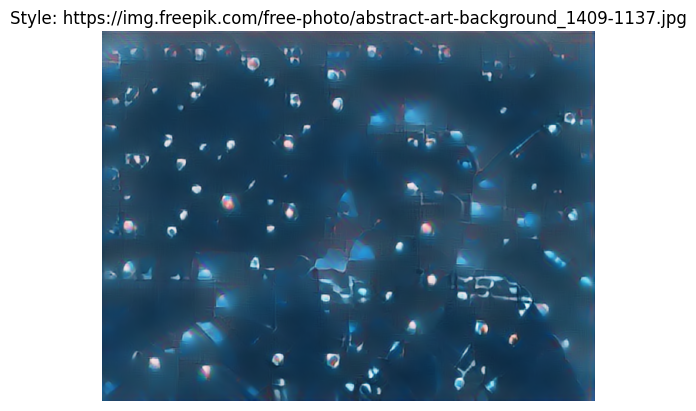

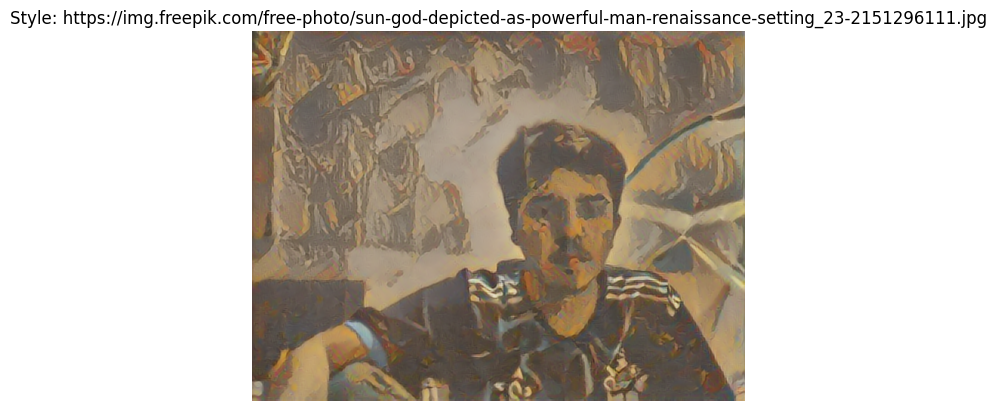

In [10]:
for url in style_image_urls:
    response = requests.get(url)
    style_image = Image.open(BytesIO(response.content))
    style_image = np.array(style_image)

    styled_image = apply_style_transfer(img, style_image)

    plt.figure()
    plt.imshow(styled_image[0])
    plt.title(f'Style: {url}')
    plt.axis('off')
    plt.show()